In [1]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model

In [2]:
#Importar los datos de la libreria scikit-learn
boston=datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
#verificar la indormación del dataset
print('Información del dataset')
print(boston.keys())

Información del dataset
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
#Verificando las caracteristicas del dataset
print('Caracteristicas del dataset')
print(boston.DESCR)

Caracteristicas del dataset
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $

In [5]:
#Verificar las catidades de datos que hay en el dataset
print(boston.data.shape)

(506, 13)


In [6]:
#Verificando la información de las columnas
print('Nombre de las columnas')
print(boston.feature_names)

Nombre de las columnas
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
#Seleccionamos la columna *5 RM* 7 distancias ponderadas a cinco centros de empleo de Boston 
x=boston.data[:,np.newaxis,7]

#Definir los datos de y
y=boston.target
y

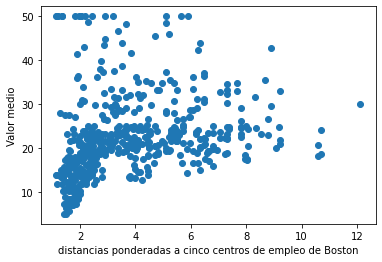

In [60]:
# Graficmos los datos correspondientes
plt.scatter(x,y)
plt.xlabel('distancias ponderadas a cinco centros de empleo de Boston')
plt.ylabel('Valor medio')
plt.show()

In [61]:
#Separando los datos de prueba y entrenamiento   30%   70%
from sklearn.model_selection import train_test_split

#Separando los datos de train en entranamiento y prueba
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [62]:
#Definición del algoritmo a utilizar
lr=linear_model.LinearRegression()

#Entrenando al modelo
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#Realizar la predicción
y_pred=lr.predict(x_test)

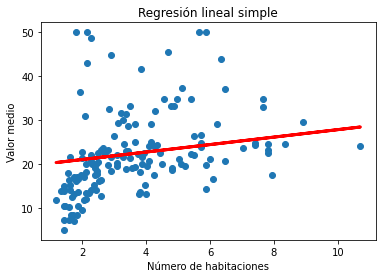

In [64]:
#Graficamos los datos del modelo
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color='red',linewidth=3)
plt.title('Regresión lineal simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [65]:
#Ver los datos de la regresión lineal

print('Valor del coeficiente o pendiente')
print(lr.coef_)

Valor del coeficiente o pendiente
[0.84961611]


In [66]:
print('Valor de la intersección')
print(lr.intercept_)

Valor de la intersección
19.329617612301764


In [67]:
# Ver la ecuación de regresión lineal
print('y=',lr.coef_,'*x',lr.intercept_)

y= [0.84961611] *x 19.329617612301764


In [68]:
# Ver la precisión del algoritmo de RL
print('Precisión del modelo')
print('R^2=',lr.score(x_train,y_train))

Precisión del modelo
R^2= 0.04159335985407609


In [69]:
#Calculando RMSE
import math
from sklearn import  metrics
MSE=metrics.mean_squared_error(y_test,y_pred)
print('RMSE=%.02f'%math.sqrt(MSE))

RMSE=8.93
